<a href="https://colab.research.google.com/github/ABHIjithGT/Academic-Programs-Semester-based/blob/main/s3/Data%20Science/Lab_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Price**

Saving Housing_Price.csv to Housing_Price.csv
=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

=== First 5 Rows ===
      price  area  bedrooms  bathrooms  stories mainroad

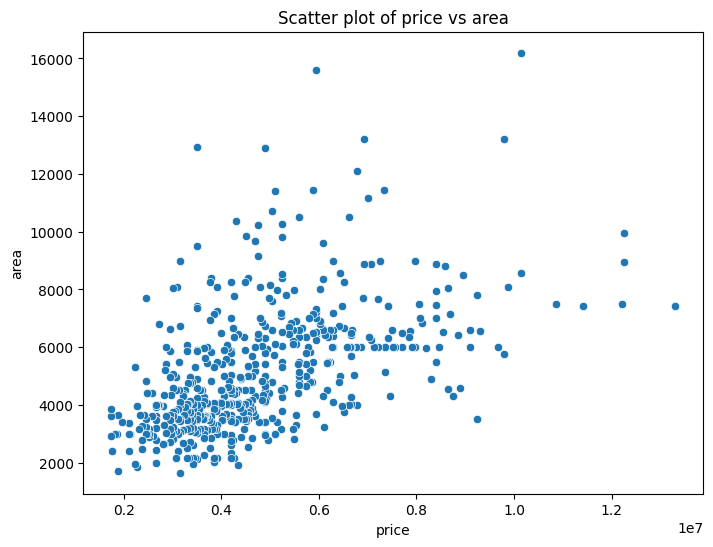

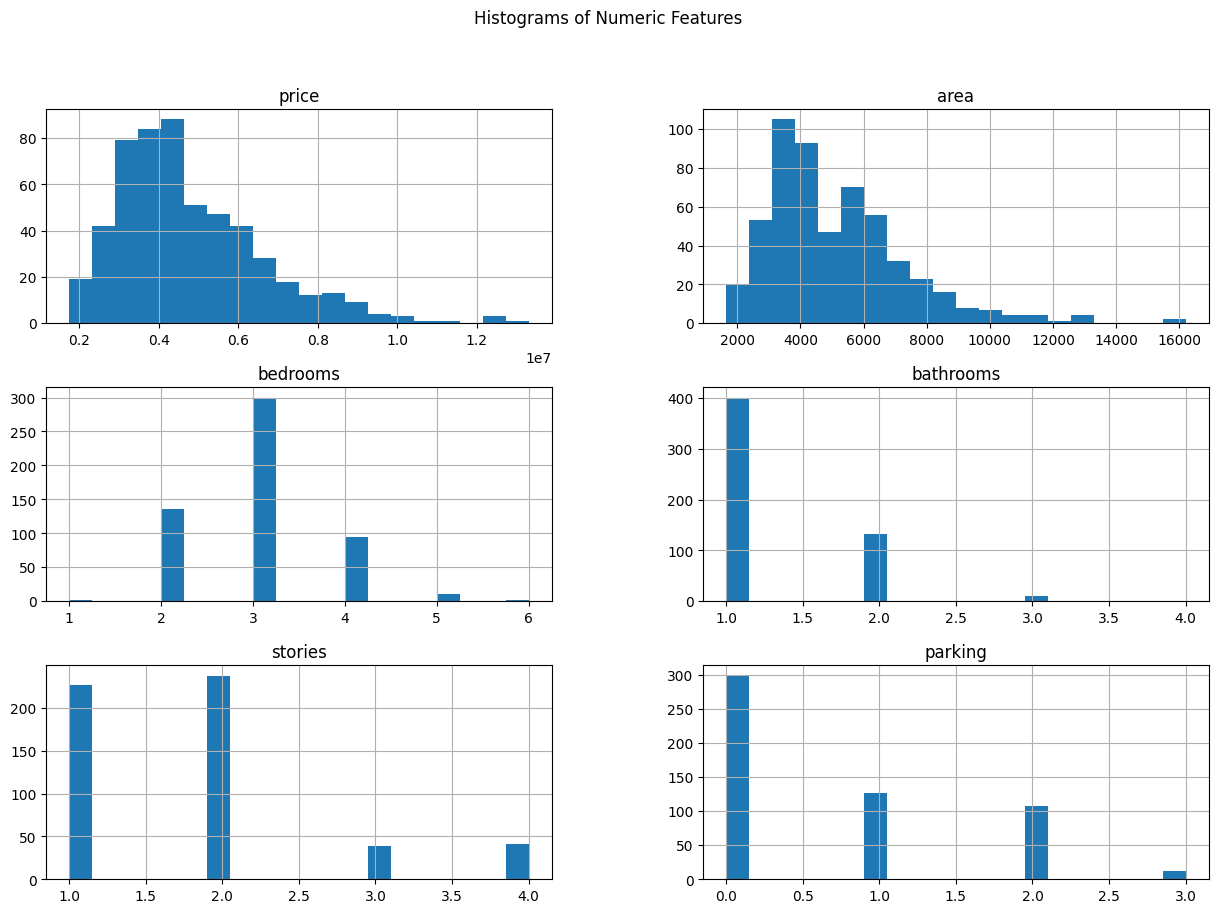

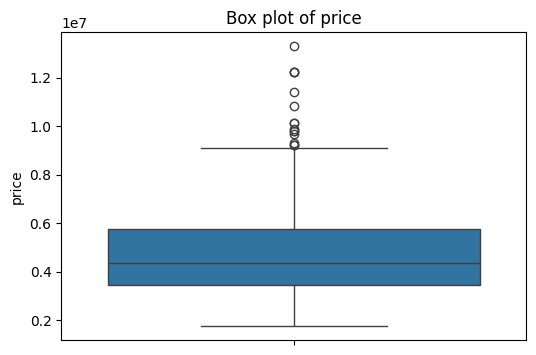

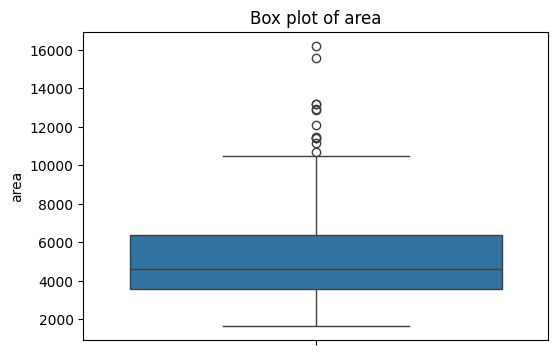

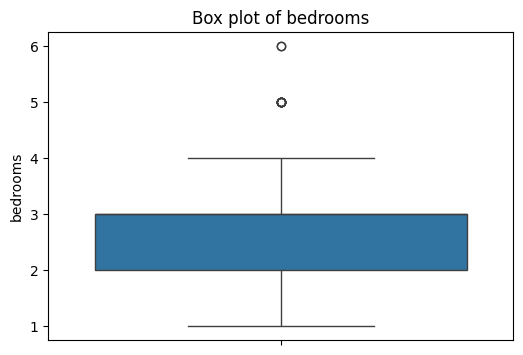

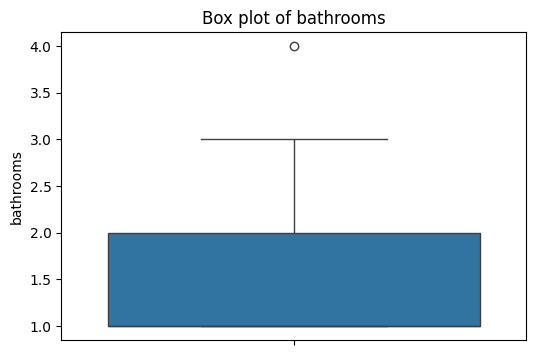

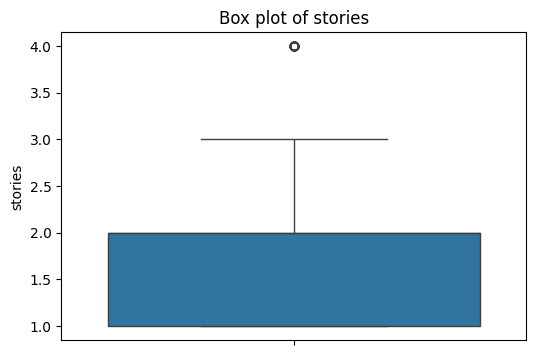

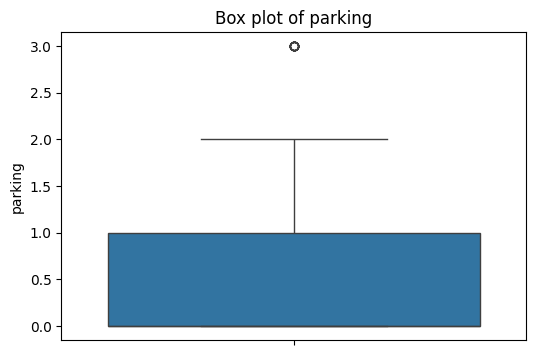

k=2: Inertia=2345.48, Silhouette=0.2952, DB Index=1.5175
k=3: Inertia=2058.79, Silhouette=0.2431, DB Index=1.7544
k=4: Inertia=1727.74, Silhouette=0.2434, DB Index=1.5518
k=5: Inertia=1594.12, Silhouette=0.2292, DB Index=1.4966
k=6: Inertia=1457.67, Silhouette=0.2340, DB Index=1.4722
k=7: Inertia=1370.11, Silhouette=0.2190, DB Index=1.4408
k=8: Inertia=1204.90, Silhouette=0.2522, DB Index=1.3500
k=9: Inertia=1153.07, Silhouette=0.2519, DB Index=1.3905
k=10: Inertia=1089.62, Silhouette=0.2379, DB Index=1.4243


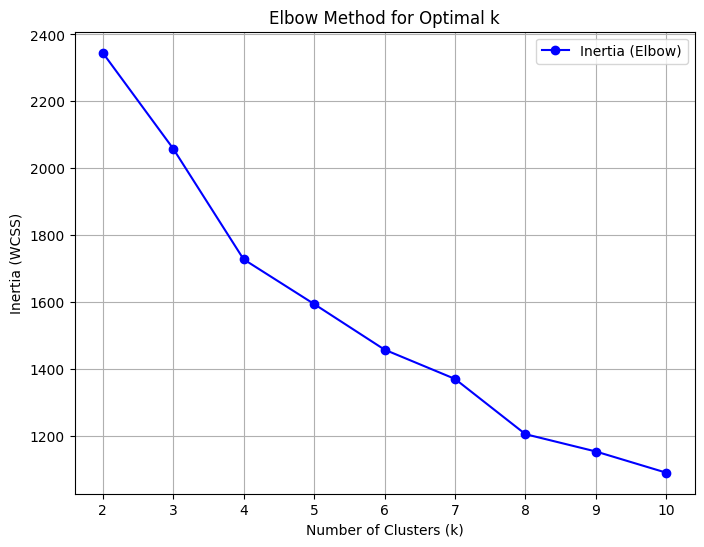

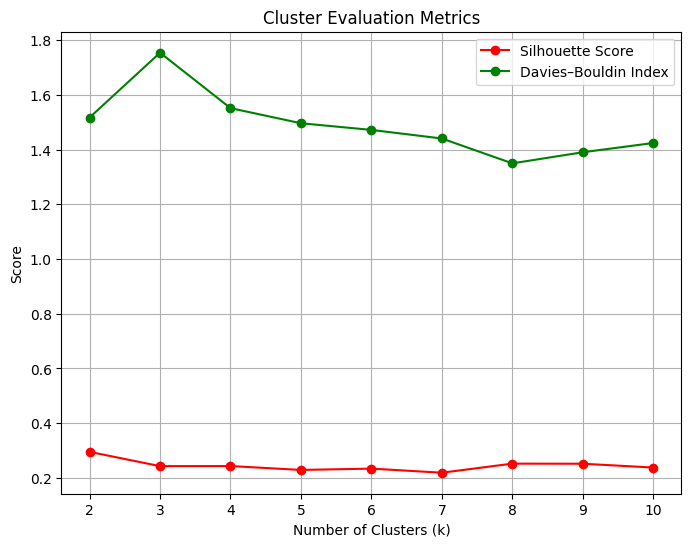


Best k based on Silhouette Score: 2


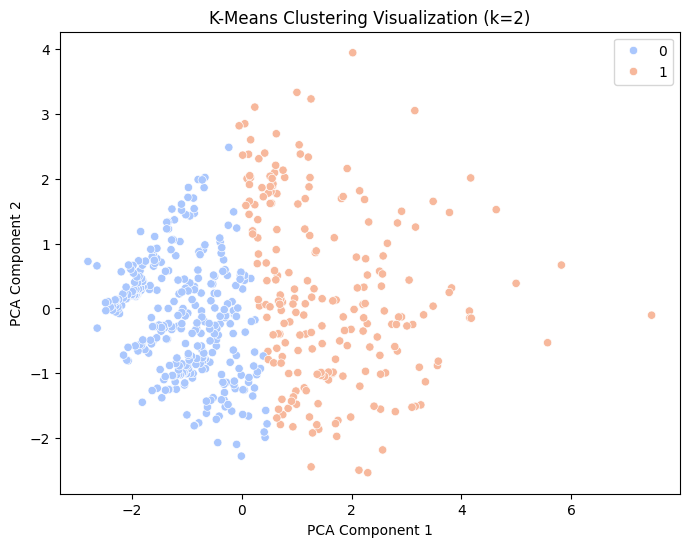

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from google.colab import files

# 1. Upload dataset
uploaded = files.upload()

# 2. Load the dataset
df = pd.read_csv('Housing_Price.csv')

# (i) Exploratory Data Analysis
print("=== Dataset Overview ===")
print(df.info())
print("\n=== First 5 Rows ===")
print(df.head())
print("\n=== Summary Statistics ===")
print(df.describe())
print("\n=== Missing Values ===")
print(df.isnull().sum())

# (ii) Visualizations
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Scatter Plot
if len(numeric_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]])
    plt.title(f'Scatter plot of {numeric_cols[0]} vs {numeric_cols[1]}')
    plt.show()

# Histograms
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Box Plots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# (iii) K-Means Clustering
X = df[numeric_cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = range(2, 11)
inertias = []
silhouettes = []
db_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, labels)
    db_index = davies_bouldin_score(X_scaled, labels)

    silhouettes.append(sil_score)
    db_scores.append(db_index)

    print(f'k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={sil_score:.4f}, DB Index={db_index:.4f}')

# (iv) Evaluation Graphs
plt.figure(figsize=(8,6))
plt.plot(k_values, inertias, 'bo-', label='Inertia (Elbow)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(k_values, silhouettes, 'ro-', label='Silhouette Score')
plt.plot(k_values, db_scores, 'go-', label='Davies–Bouldin Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Cluster Evaluation Metrics')
plt.grid(True)
plt.legend()
plt.show()

# Optional: Visualize clusters for best k (based on highest Silhouette)
best_k = k_values[np.argmax(silhouettes)]
print(f"\nBest k based on Silhouette Score: {best_k}")

kmeans_best = KMeans(n_clusters=best_k, random_state=42)
labels_best = kmeans_best.fit_predict(X_scaled)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_best, palette='coolwarm')
plt.title(f'K-Means Clustering Visualization (k={best_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


Saving Housing_Price.csv to Housing_Price.csv
=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

=== First 5 Rows ===
      price  area  bedrooms  bathrooms  stories mainroad

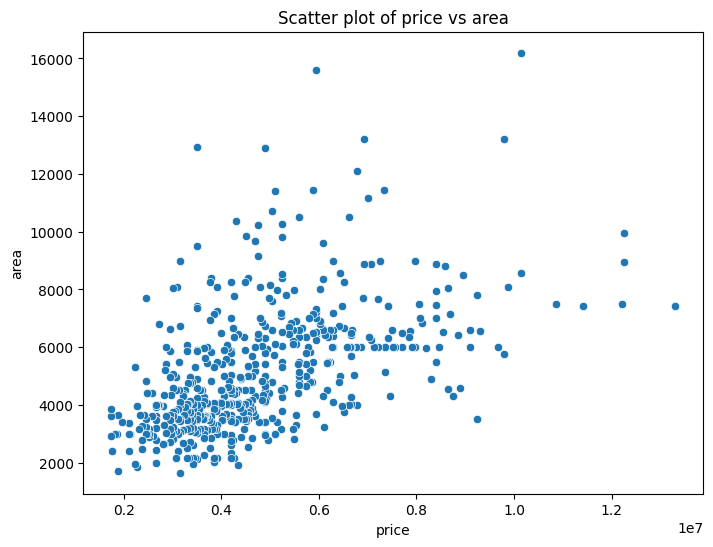

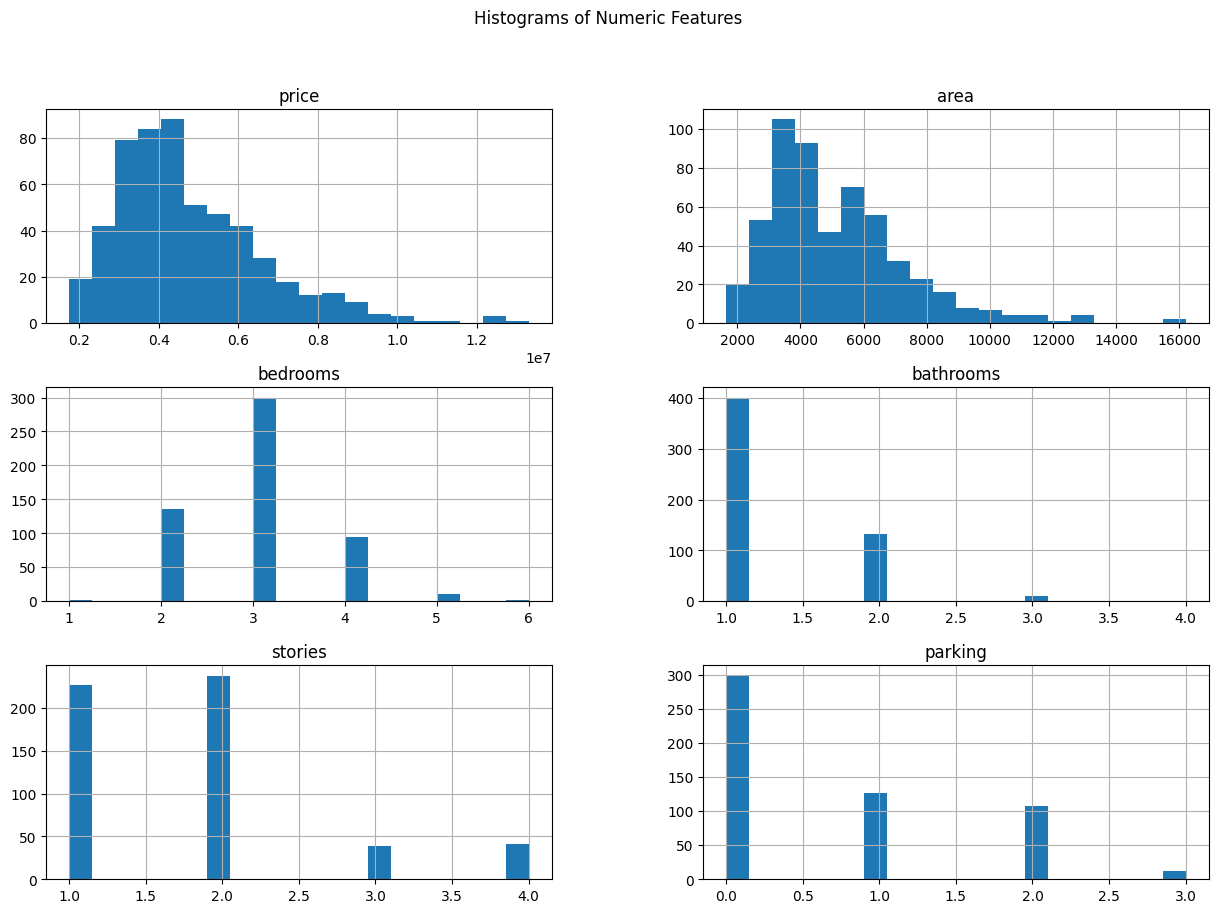

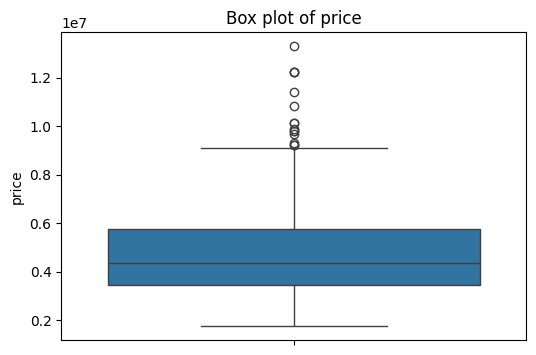

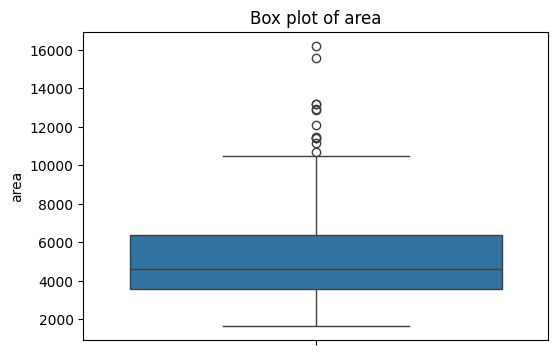

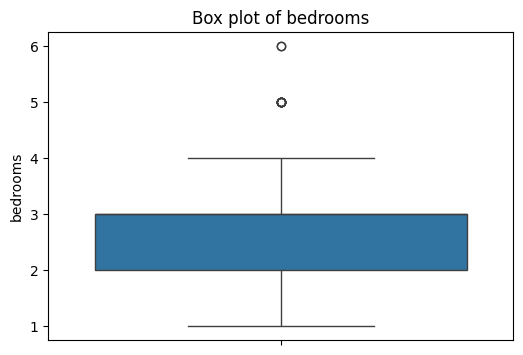

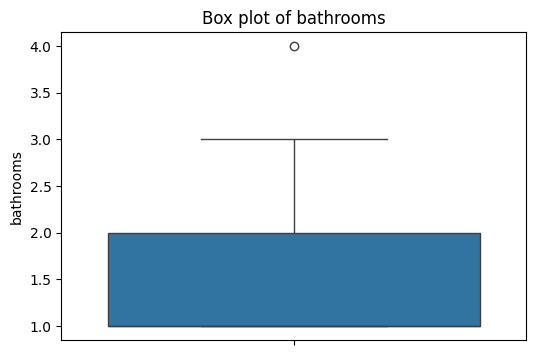

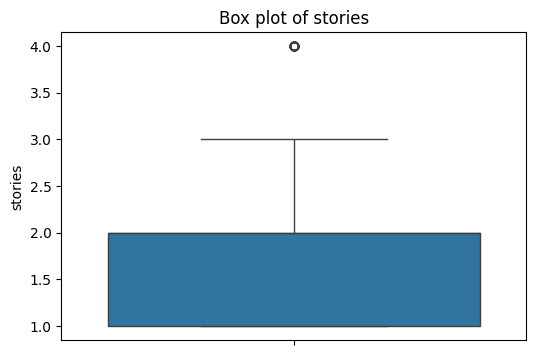

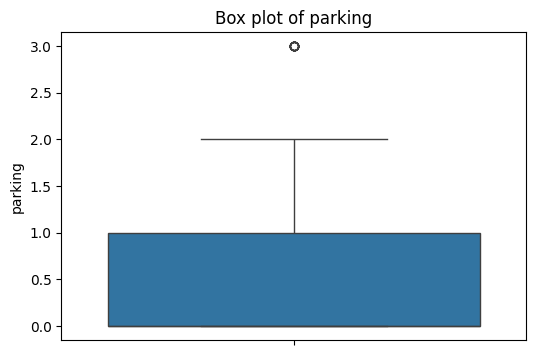

k=2: Inertia=2345.48, Silhouette Score=0.2952
k=3: Inertia=2058.79, Silhouette Score=0.2431
k=4: Inertia=1727.74, Silhouette Score=0.2434
k=5: Inertia=1594.12, Silhouette Score=0.2292
k=6: Inertia=1457.67, Silhouette Score=0.2340
k=7: Inertia=1370.11, Silhouette Score=0.2190
k=8: Inertia=1204.90, Silhouette Score=0.2522
k=9: Inertia=1153.07, Silhouette Score=0.2519
k=10: Inertia=1089.62, Silhouette Score=0.2379


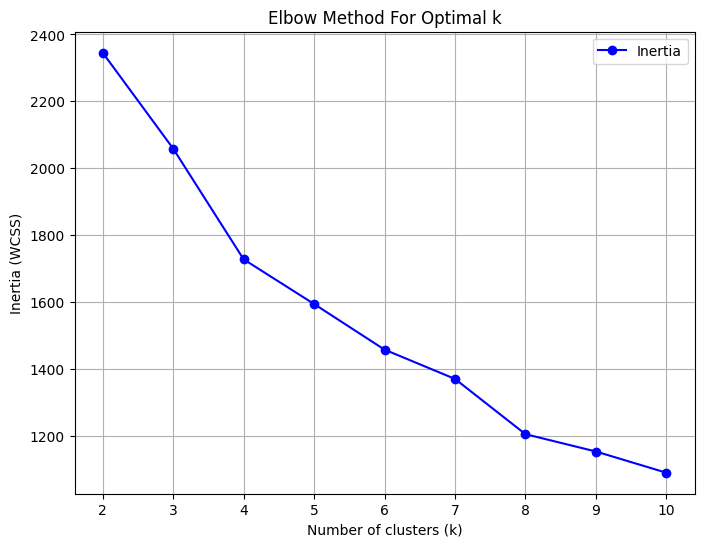

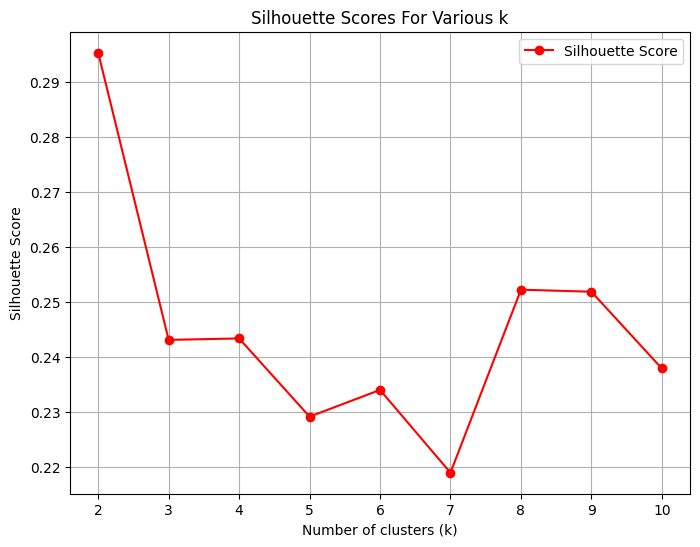

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files

# 1. Upload the dataset
uploaded = files.upload()

# 2. Load the dataset
df = pd.read_csv('Housing_Price.csv')

# (i) Exploratory Data Analysis (EDA)

print("=== Dataset Overview ===")
print(df.info())

print("\n=== First 5 Rows ===")
print(df.head())

print("\n=== Summary Statistics ===")
print(df.describe())

print("\n=== Missing Values ===")
print(df.isnull().sum())

# (ii) Visualization

# Scatter plot example: Plot first two numeric features against each other (adjust based on columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]])
    plt.title(f'Scatter plot of {numeric_cols[0]} vs {numeric_cols[1]}')
    plt.show()
else:
    print("Not enough numeric columns for scatter plot.")

# Histogram for numeric columns
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Box plot for numeric columns (one by one)
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# (iii) K-Means Clustering

# Data preprocessing: Keep numeric, drop missing
X = df[numeric_cols].dropna()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different k values, calculate inertia and silhouette score
k_values = range(2, 11)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, cluster_labels)
    silhouettes.append(sil_score)
    print(f'k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={sil_score:.4f}')

# Plot Inertia (Elbow method)
plt.figure(figsize=(8,6))
plt.plot(k_values, inertias, 'bo-', label='Inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8,6))
plt.plot(k_values, silhouettes, 'ro-', label='Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Various k')
plt.grid(True)
plt.legend()
plt.show()
